In [2]:
csv_file_path = "C:/Users/Ying/Desktop/exp_skill_adaptation/Vscode/Data_analysis/000/processed_data_006.csv"
data = pd.read_csv(csv_file_path)
#data = data[data['trial_index'] != 522]   #001
#data = data[data['trial_index'] != 226]   #005
data = data[data['trial_index'] != 228]   #006
#data = data[data['trial_index'] != 767]   #007

In [3]:
def string_to_float_list(string_data):
    try:
        float_list = ast.literal_eval(string_data)
        if all(isinstance(item, float) for item in float_list):
            return float_list
        else:
            print("Not all elements are floats.")
            return None
    except ValueError as e:
        print("Conversion failed for element:", string_data)
        print("Error:", e)
        return None

def process_column_to_float_list(column):
    result = []
    for string_data in column:
        float_list = string_to_float_list(string_data)
        if float_list is not None:
            result.append(float_list)
    return result


data['mouse_x'] = process_column_to_float_list(data['mouse_x'])
data['mouse_y'] = process_column_to_float_list(data['mouse_y'])
data['mouse_time'] = process_column_to_float_list(data['mouse_time'])
data['velocities'] = process_column_to_float_list(data['velocities'])

In [4]:
R = 8
theta = np.linspace(0, 2*np.pi, 100)
circle_x = R * np.cos(theta)
circle_y = R * np.sin(theta)


### Plots

#### Movement trace

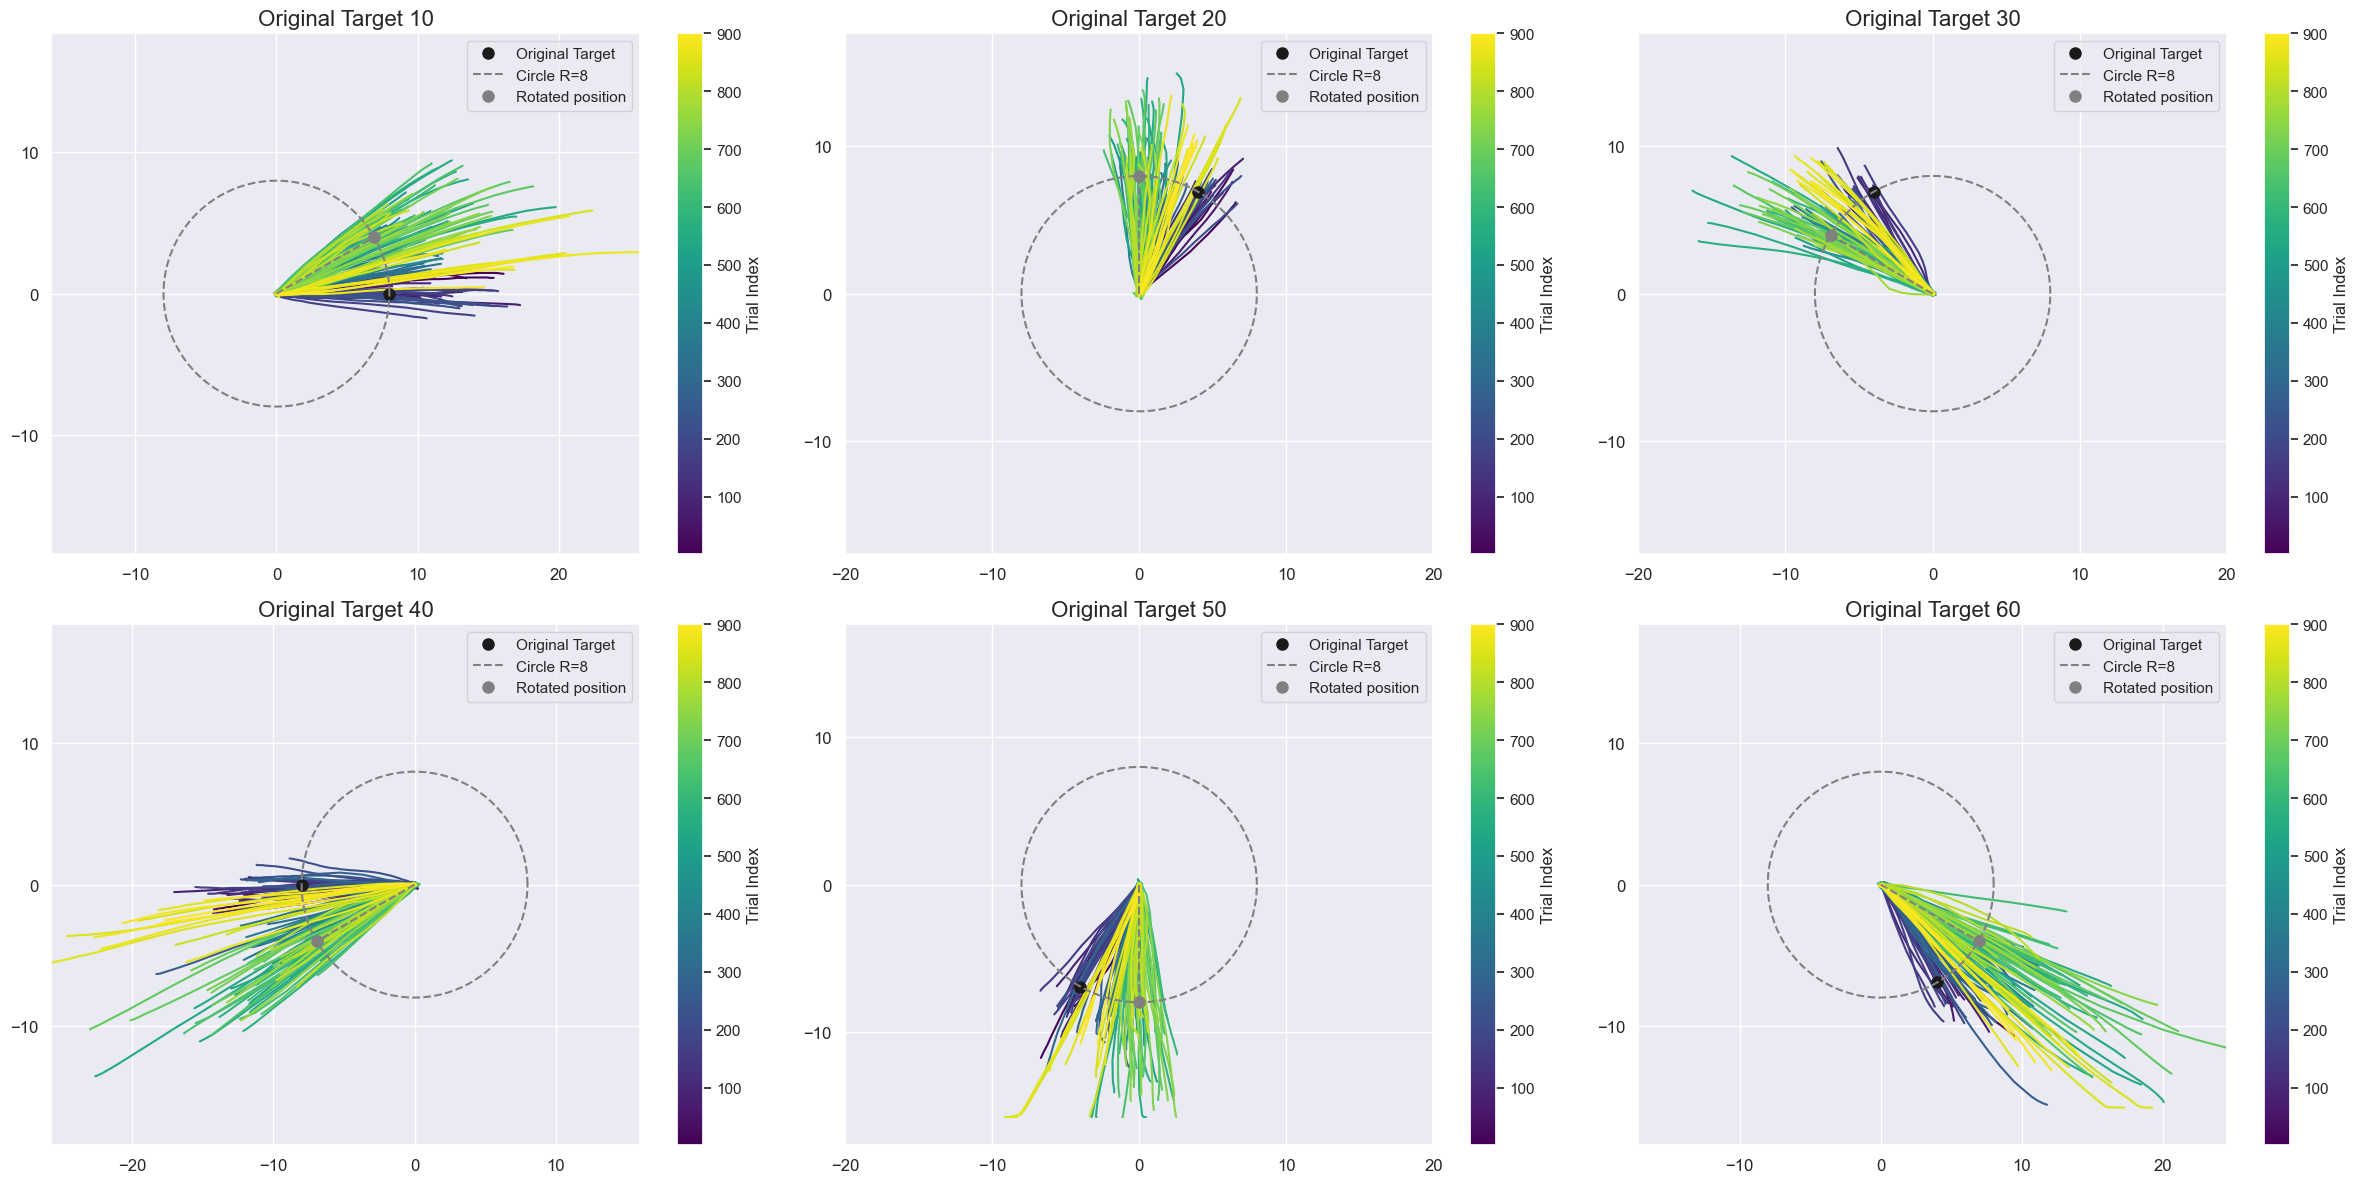

In [5]:
def plot_movement_trace_original(df, num_rows=2, num_cols=3, figsize=(24, 12)):
    
    data_original = data[data['type'] == 'original']

    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
    axs = axs.flatten()  

    colormap_original = plt.cm.viridis
    target_numbers = data_original['target_number'].unique()

    for i, target_number in enumerate(target_numbers):
        target_data = data_original[data_original['target_number'] == target_number]
        ax = axs[i]

        trials = target_data['trial_index'].unique()
        
        for j, trial in enumerate(trials):
            trial_data = target_data[target_data['trial_index'] == trial]
            mouse_x = trial_data['mouse_x'].iloc[0]
            mouse_y= trial_data['mouse_y'].iloc[0]
            ax.plot(mouse_x, mouse_y,color=colormap_original(trial_data['trial_index'] / 900))

        target_x = target_data['target_x'].iloc[0]
        target_y = target_data['target_y'].iloc[0]
        ax.plot(target_x, target_y, 'ko', markersize=8, label='Original Target')
        ax.plot(circle_x, circle_y, linestyle='--', color='gray', label='Circle R=8')
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.axis("equal")
        ax.set_title(f'Regular Target {target_number}', fontsize=24)

        rotated_x = target_x * np.cos(np.deg2rad(30)) - target_y * np.sin(np.deg2rad(30))
        rotated_y = target_x * np.sin(np.deg2rad(30)) + target_y * np.cos(np.deg2rad(30))
        ax.plot(rotated_x, rotated_y, 'o', color='gray', markersize=8, label='Rotated position')
        ax.plot([0, rotated_x], [0, rotated_y], linestyle='--', color='gray')

        colors = plt.cm.ScalarMappable(cmap=colormap_original, norm=plt.Normalize(vmin=1, vmax=900))
        colors.set_array(range(1, 901))
        colorbar = plt.colorbar(colors, ax=ax)
        colorbar.set_label('Trial Index')

        ax.set_title(f'Original Target {target_number}', fontsize=16)
        ax.axis("equal")
        ax.set_xticks((-20,-10,0,10,20))
        ax.set_yticks((-20,-10,0,10,20))
        ax.legend()

    plt.tight_layout()
    plt.savefig('pictures/movement_trace_1.png')

plot_movement_trace_original(data)

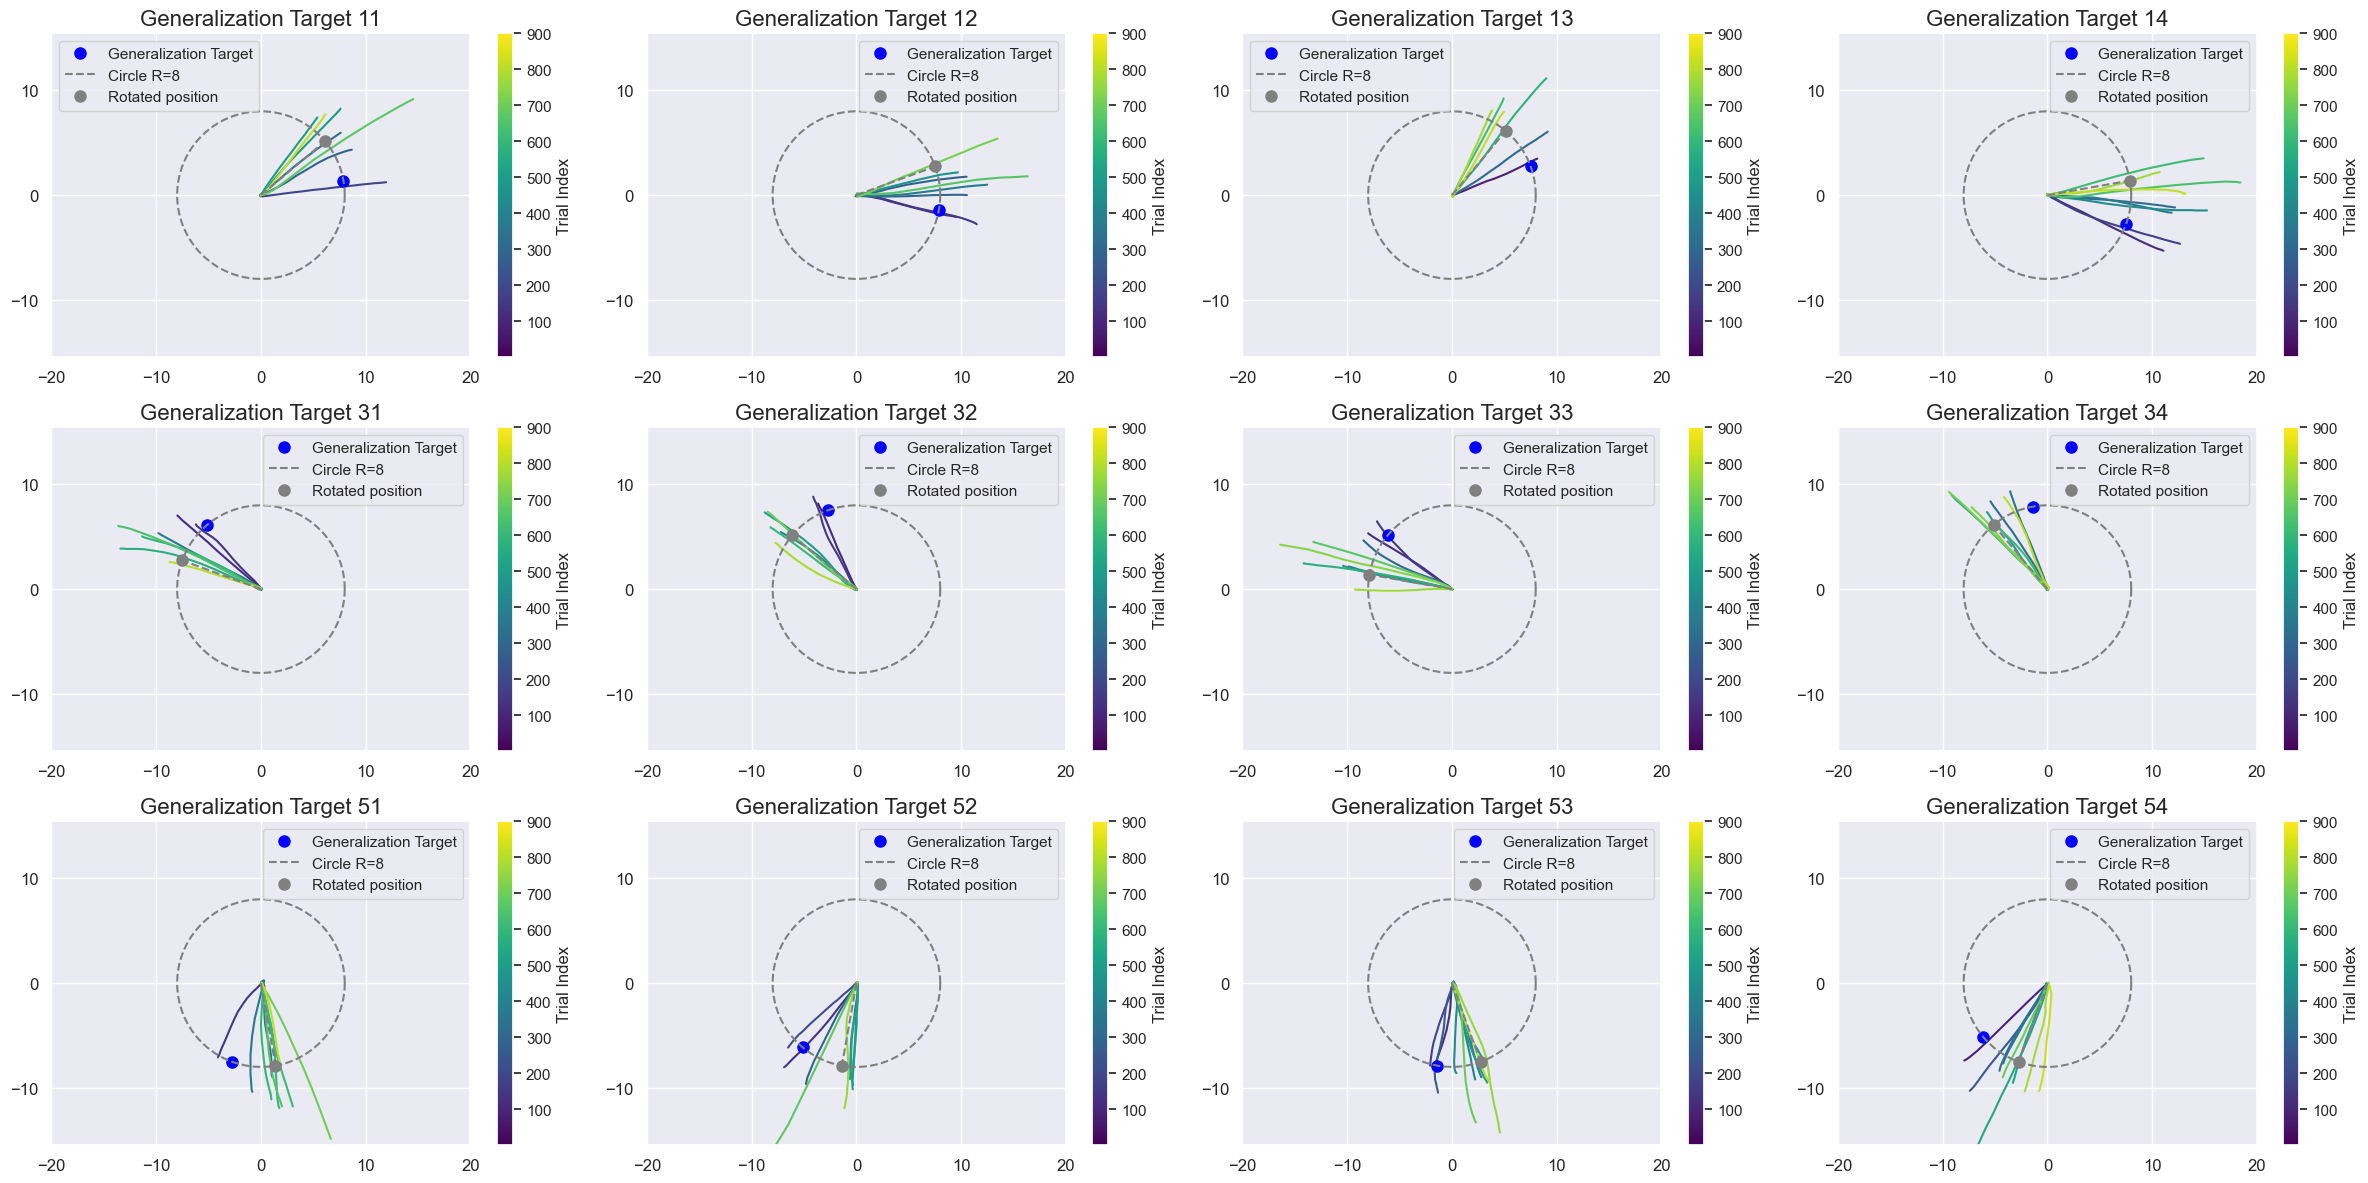

In [6]:
def plot_movement_trace_generalization(df, num_rows=3, num_cols=4, figsize=(24, 12)):
    
    data_generalization = data[data['type'] == 'generalization']

    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
    axs = axs.flatten()  

    colormap_generalization = plt.cm.viridis
    target_numbers = data_generalization['target_number'].unique()

    for i, target_number in enumerate(target_numbers):
        target_data = data_generalization[data_generalization['target_number'] == target_number]
        ax = axs[i]

        trials = target_data['trial_index'].unique()
        
        for j, trial in enumerate(trials):
            trial_data = target_data[target_data['trial_index'] == trial]
            mouse_x = trial_data['mouse_x'].iloc[0]
            mouse_y= trial_data['mouse_y'].iloc[0]
            ax.plot(mouse_x, mouse_y,color=colormap_generalization(trial_data['trial_index'] / 900))


        target_x = target_data['target_x'].iloc[0]
        target_y = target_data['target_y'].iloc[0]
        ax.plot(target_x, target_y, 'o', markersize=8, color='blue',label='Generalization Target')
        ax.plot(circle_x, circle_y, linestyle='--', color='gray', label='Circle R=8')
        ax.tick_params(axis='both', which='major', labelsize=12)

        rotated_x = target_x * np.cos(np.deg2rad(30)) - target_y * np.sin(np.deg2rad(30))
        rotated_y = target_x * np.sin(np.deg2rad(30)) + target_y * np.cos(np.deg2rad(30))
        ax.plot(rotated_x, rotated_y, 'o', color='gray', markersize=8, label='Rotated position')
        ax.plot([0, rotated_x], [0, rotated_y], linestyle='--', color='gray')

        colors = plt.cm.ScalarMappable(cmap=colormap_generalization, norm=plt.Normalize(vmin=1, vmax=900))
        colors.set_array(range(1, 901))
        colorbar = plt.colorbar(colors, ax=ax)
        colorbar.set_label('Trial Index')

        ax.set_title(f'Generalization Target {target_number}', fontsize=16)
        ax.axis("equal")
        ax.set_xticks((-20,-10,0,10,20))
        ax.set_yticks((-20,-10,0,10,20))
        ax.legend()

    plt.tight_layout()
    plt.savefig('pictures/movement_trace_2.png')

plot_movement_trace_generalization(data)

#### Velocity

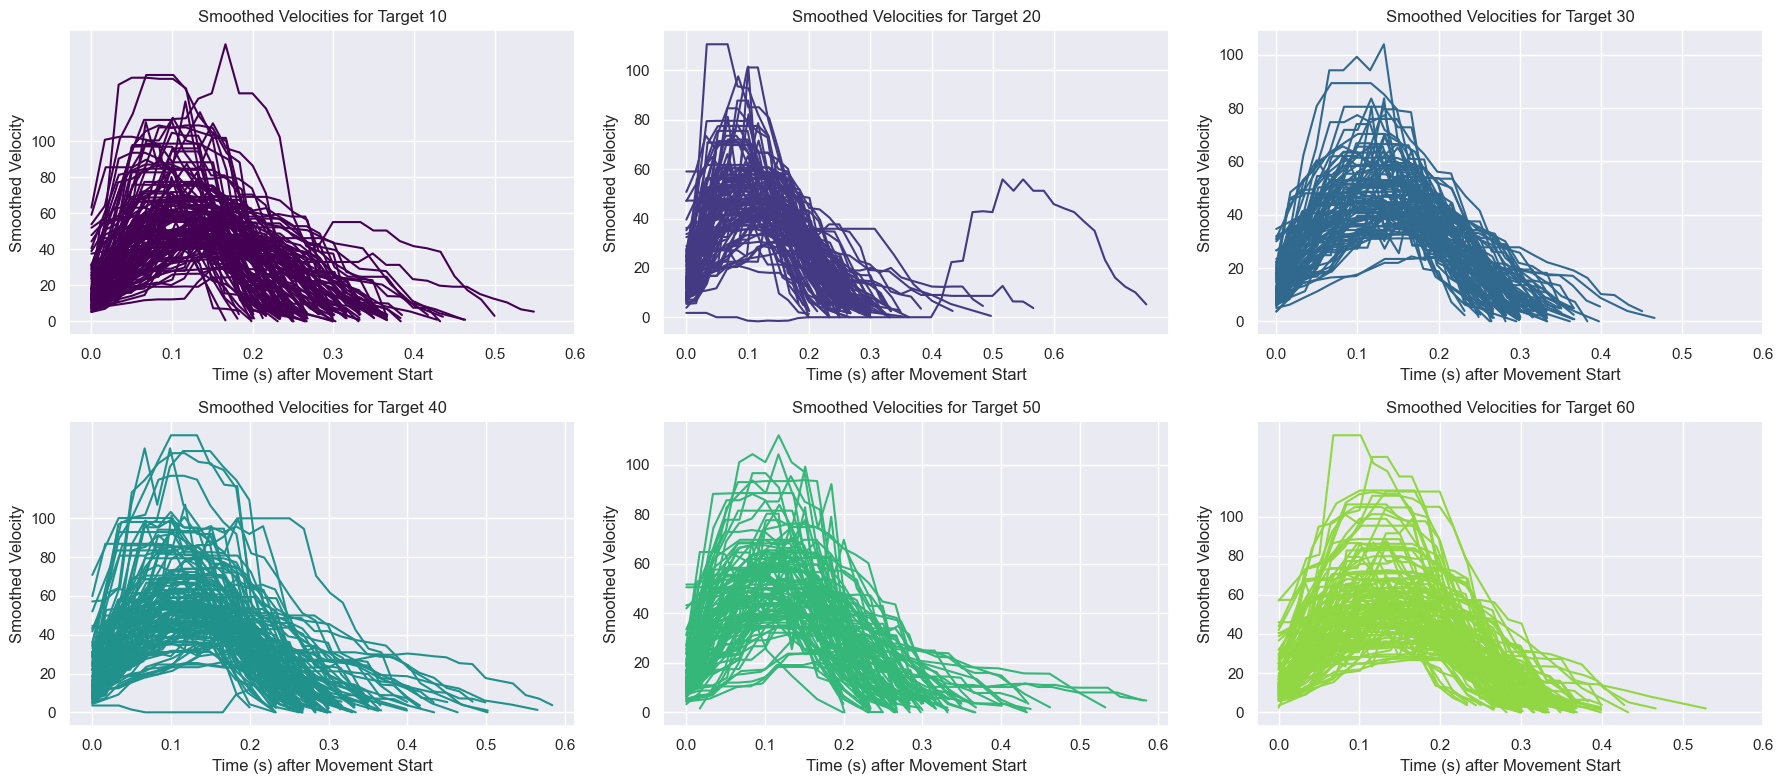

In [7]:
def plot_velocities_original(data, target_numbers, num_trials=10, kernel_size=5):
    num_rows = 2
    num_cols = 3
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 8))
    axs = axs.flatten() 

    colormap = plt.cm.viridis

    for i, target_number in enumerate(target_numbers):
        ax = axs[i]

        target_data = data[data['target_number'] == target_number]

        if len(target_data) > num_trials:
            sampled_data = target_data.sample(n=num_trials)
        else:
            sampled_data = target_data

        for index, row in sampled_data.iterrows():
            velocities = np.array(row['velocities'])
            start_time = row['start_times']
            times = np.array(row['mouse_time'])  

            times = times - start_time
            start_index = np.argmax(times >= 0)  

            velocities = velocities[start_index:]
            times = times[start_index:]
            if len(velocities) >= kernel_size:
                smoothed_velocities = medfilt(velocities, kernel_size=kernel_size)
                ax.plot(times[:len(smoothed_velocities)], smoothed_velocities, label=f'Trial {row["trial_index"]}', color=colormap(i / len(target_numbers)))

        ax.set_title(f'Smoothed Velocities for Target {target_number}')
        ax.set_xlabel('Time (s) after Movement Start')
        ax.set_ylabel('Smoothed Velocity')
        ax.set_xticks((0,0.1,0.2,0.3,0.4,0.5,0.6))
        ax.set_yticks((0,20,40,60,80,100))
        #ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.savefig('pictures/velocity_1.png')
    #plt.show()

plot_velocities_original(data, target_numbers=[10, 20, 30, 40, 50, 60], num_trials=200)


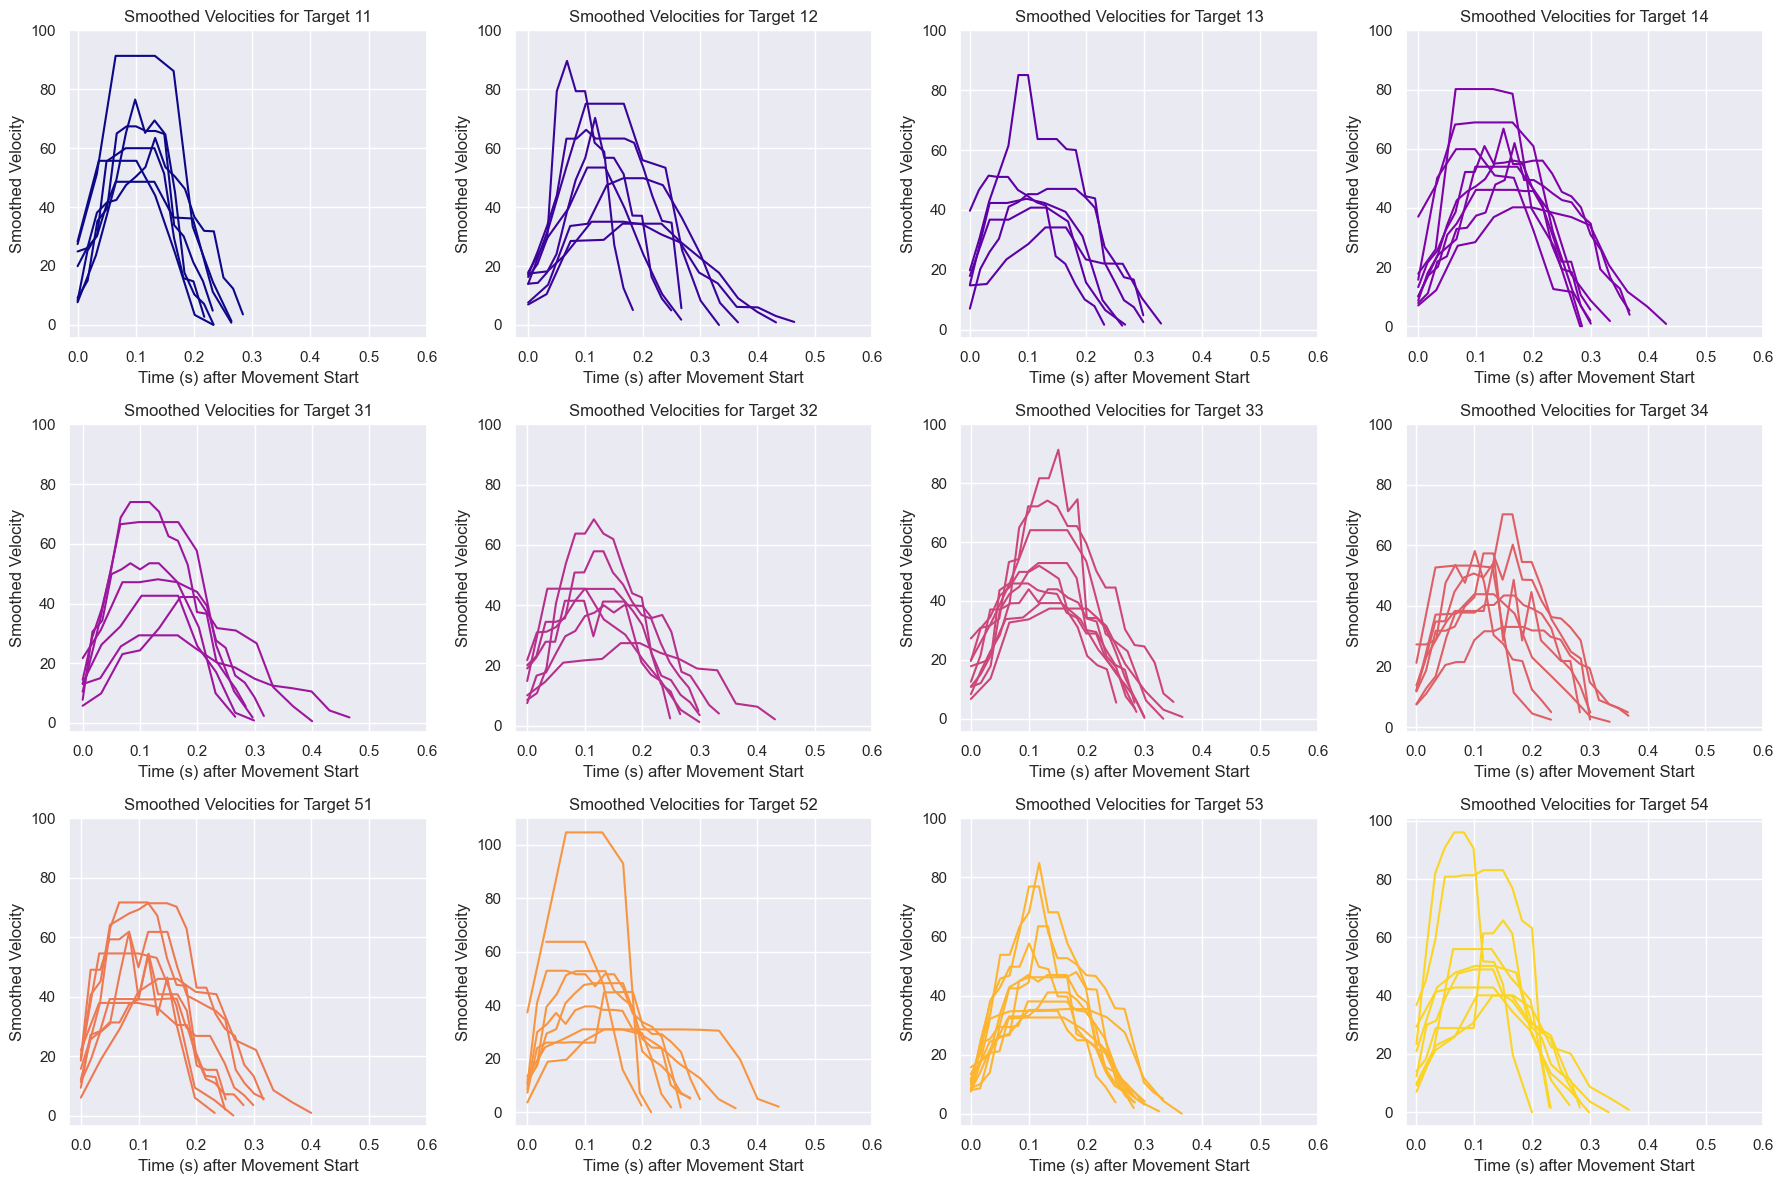

In [8]:
def plot_velocities_generalization(data, target_numbers, num_trials=10, kernel_size=5):
    num_rows = 3
    num_cols = 4
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 12))
    axs = axs.flatten() 

    colormap = plt.cm.plasma

    for i, target_number in enumerate(target_numbers):
        ax = axs[i]

        target_data = data[data['target_number'] == target_number]

        if len(target_data) > num_trials:
            sampled_data = target_data.sample(n=num_trials)
        else:
            sampled_data = target_data

        for index, row in sampled_data.iterrows():
            velocities = np.array(row['velocities'])
            start_time = row['start_times']
            times = np.array(row['mouse_time'])  

            times = times - start_time
            start_index = np.argmax(times >= 0)  

            velocities = velocities[start_index:]
            times = times[start_index:]
            if len(velocities) >= kernel_size:
                smoothed_velocities = medfilt(velocities, kernel_size=kernel_size)
                ax.plot(times[:len(smoothed_velocities)], smoothed_velocities, label=f'Trial {row["trial_index"]}', color=colormap(i / len(target_numbers)))

        ax.set_title(f'Smoothed Velocities for Target {target_number}')
        ax.set_xlabel('Time (s) after Movement Start')
        ax.set_ylabel('Smoothed Velocity')
        ax.set_xticks((0,0.1,0.2,0.3,0.4,0.5,0.6))
        ax.set_yticks((0,20,40,60,80,100))
        #ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.savefig('pictures/velocity_2.png')
    #plt.show()

plot_velocities_generalization(data, target_numbers=[11,12,13,14,31,32,33,34,51,52,53,54], num_trials=100)

#### Movement time

##### Whole movement

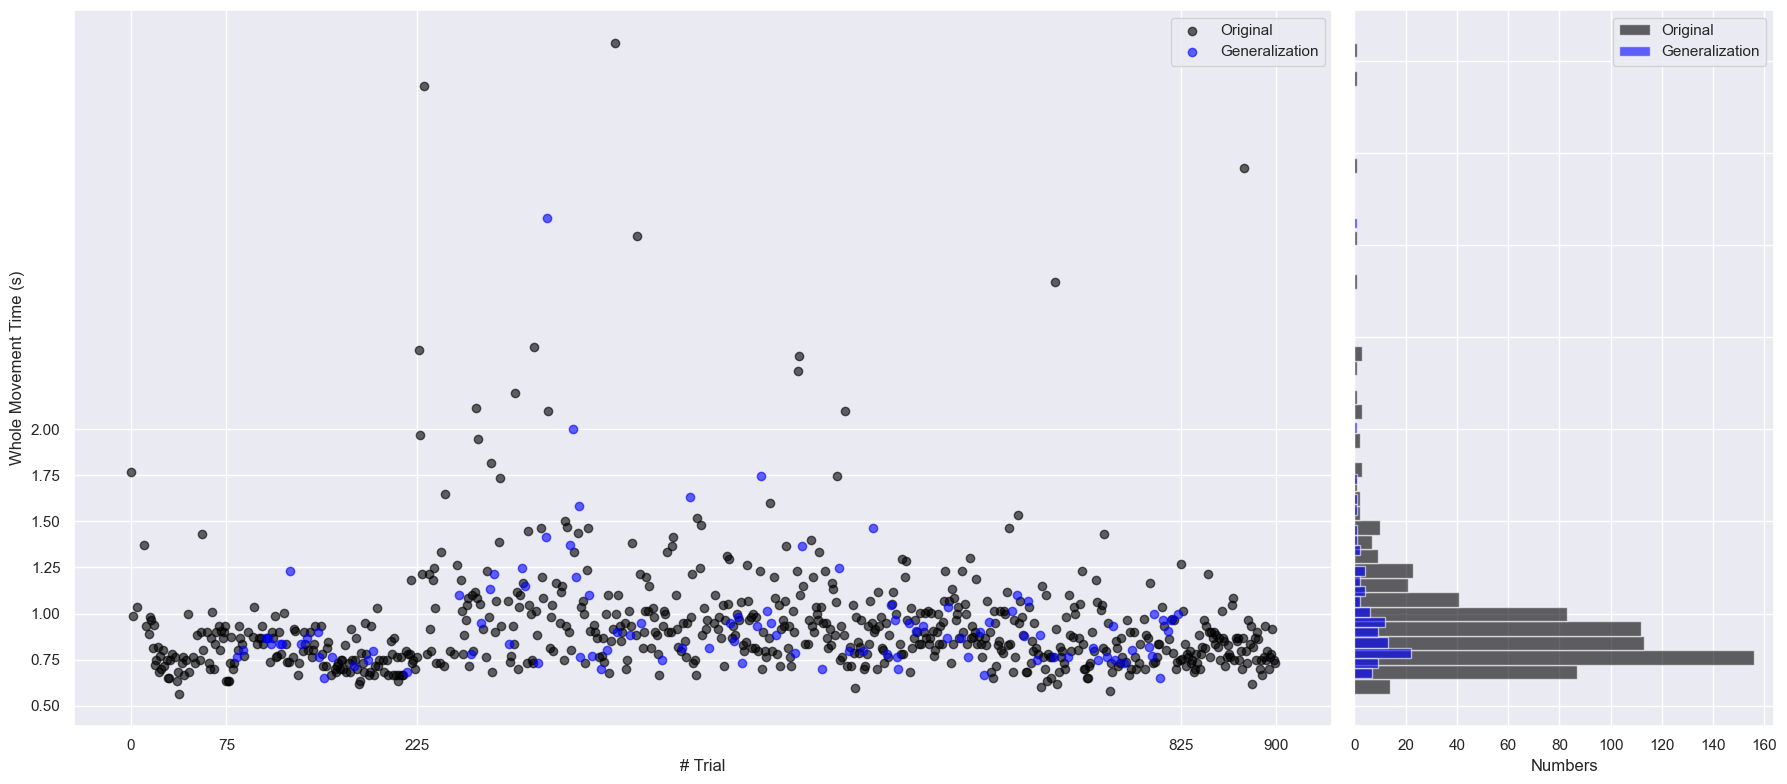

In [9]:
def plot_movement_time_and_distribution(data):
    fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(18, 8))

    original_data = data[data['type'] == 'original']
    generalization_data = data[data['type'] == 'generalization']

    axs[0].scatter(original_data['trial_index'], original_data['whole_movement_time'], alpha=0.6, color='black', label='Original')
    axs[0].scatter(generalization_data['trial_index'], generalization_data['whole_movement_time'], alpha=0.6, color='blue', label='Generalization')
    axs[0].set_xlabel('# Trial')
    axs[0].set_ylabel('Whole Movement Time (s)')
    axs[0].set_xticks([0, 75, 225, 825, 900])
    axs[0].set_yticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
    axs[0].legend()

    axs[1].hist(original_data['whole_movement_time'], bins=45, orientation='horizontal', color='black', alpha=0.6, label='Original')
    axs[1].hist(generalization_data['whole_movement_time'], bins=45, orientation='horizontal', color='blue', alpha=0.6, label='Generalization')
    axs[1].set_xlabel('Numbers')
    axs[1].set_yticklabels([])
    axs[1].legend()

    plt.tight_layout()
    plt.savefig('pictures/movement_time_1.png')
    #plt.show()

plot_movement_time_and_distribution(data)


##### Movement until 8cm

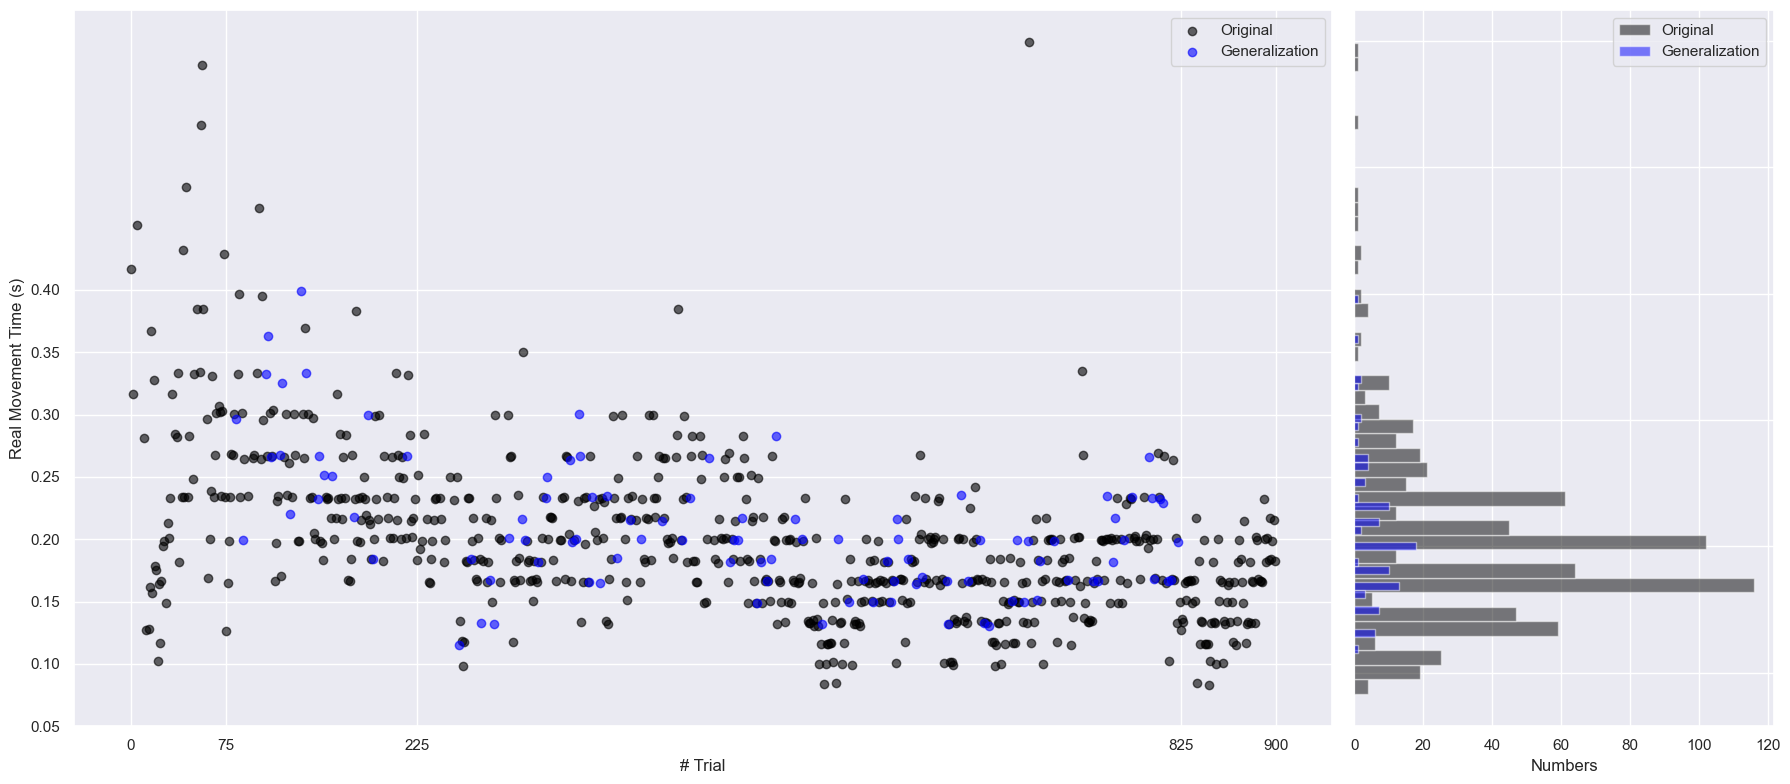

In [10]:
def calculate_and_plot_real_movement_time(data):
    data['real_movement_time'] = data['end_times'] - data['start_times']
    
    fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(18, 8))
    
    original_data = data[data['type'] == 'original']
    generalization_data = data[data['type'] == 'generalization']

    axs[0].scatter(original_data['trial_index'], original_data['real_movement_time'], alpha=0.6, color='black', label='Original')
    axs[0].scatter(generalization_data['trial_index'], generalization_data['real_movement_time'], alpha=0.6, color='blue', label='Generalization')
    #axs[0].set_title('Real Movement Time')
    axs[0].set_xticks([0, 75, 225, 825, 900])
    axs[0].set_yticks([0.05, 0.1, 0.15, 0.2,0.25, 0.3, 0.35, 0.4])
    axs[0].set_xlabel('# Trial')
    axs[0].set_ylabel('Real Movement Time (s)')
    axs[0].legend()

    axs[1].hist(original_data['real_movement_time'], bins=45, orientation='horizontal', color='black', alpha=0.5,label='Original')
    axs[1].hist(generalization_data['real_movement_time'], bins=45, orientation='horizontal', color='blue', alpha=0.5, label='Generalization')
    #axs[1].set_title('Frequency Distribution')
    axs[1].set_xlabel('Numbers')
    axs[1].set_yticklabels([])
    axs[1].legend()

    plt.tight_layout()
    plt.savefig('pictures/movement_time_2.png')
    #plt.show()

calculate_and_plot_real_movement_time(data)

#### Reaction time

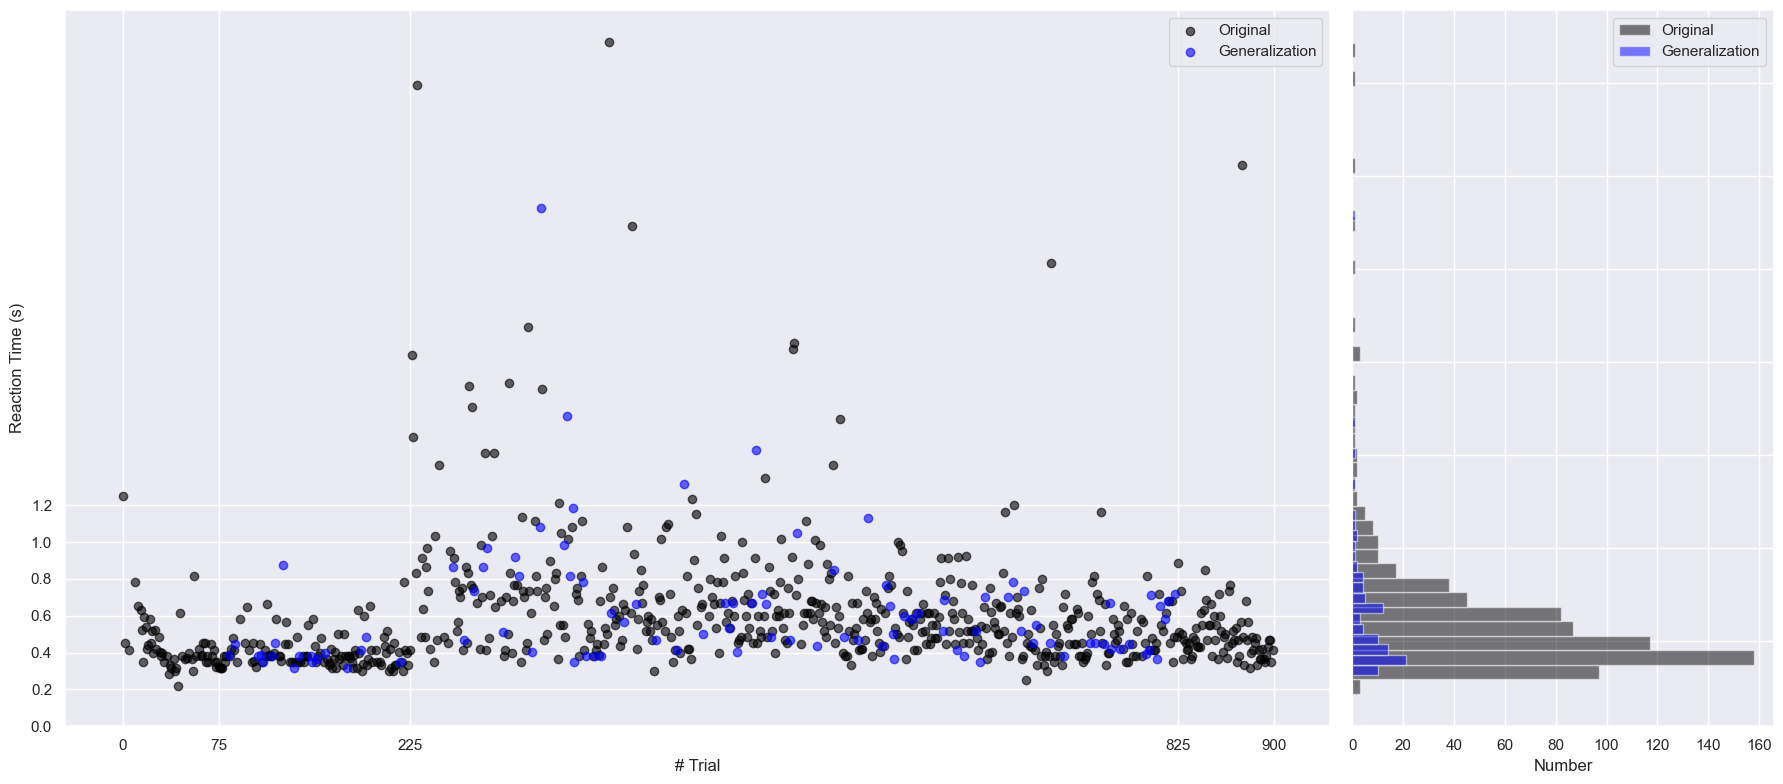

In [11]:
def calculate_and_plot_reaction_time(data):
    data['wait_times'] = data['target_appearance'] - data['move_routine_started']
    data['reaction_time'] = data['start_times'] - data['wait_times']
    
    fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(18, 8))
    
    original_data = data[data['type'] == 'original']
    generalization_data = data[data['type'] == 'generalization']
    
    axs[0].scatter(original_data['trial_index'], original_data['reaction_time'], alpha=0.6, color='black', label='Original')
    axs[0].scatter(generalization_data['trial_index'], generalization_data['reaction_time'], alpha=0.6, color='blue', label='Generalization')
    axs[0].set_xticks([0, 75, 225, 825, 900])
    axs[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1,1.2])
    axs[0].set_xlabel('# Trial')
    axs[0].set_ylabel('Reaction Time (s)')
    axs[0].legend()
    
    axs[1].hist(original_data['reaction_time'], bins=45, orientation='horizontal', color='black', alpha=0.5,label='Original')
    axs[1].hist(generalization_data['reaction_time'], bins=45, orientation='horizontal', color='blue', alpha=0.5, label='Generalization')
    axs[1].set_xlabel('Number')
    axs[1].set_yticklabels([])
    axs[1].legend()

    plt.tight_layout()
    plt.savefig('pictures/reaction_time.png')
    #plt.show()

calculate_and_plot_reaction_time(data)

#### Learning curve

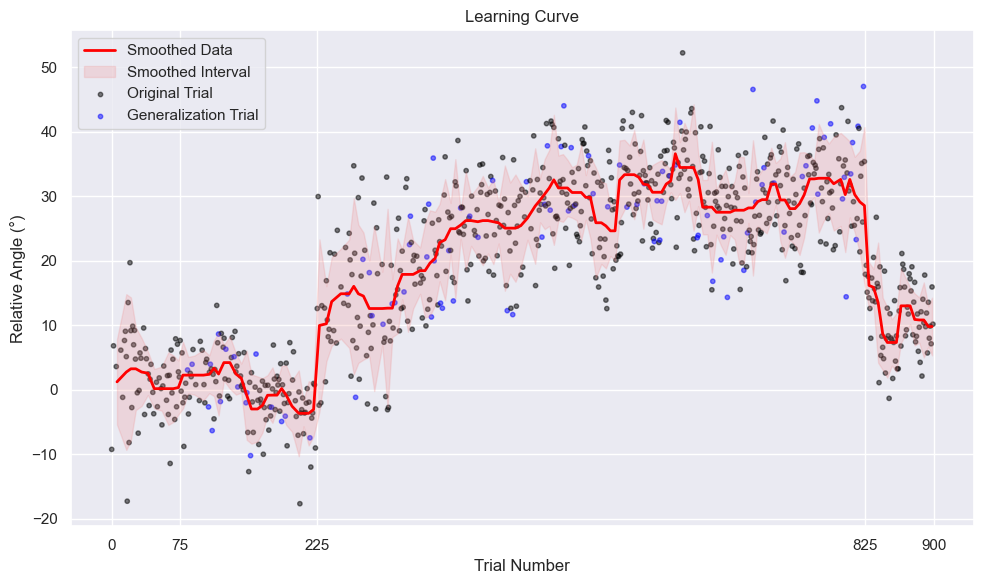

In [12]:
def plot_learning_curve(data):
    fig, ax = plt.subplots(figsize=(10, 6))

    original_color = 'black'
    generalization_color = 'blue'
    smoothed_color = 'red'
    interval_color = 'lightcoral'

    data['is_generalization'] = data['type'] == 'generalization'
    data.sort_values('trial_index', inplace=True)

    bin_size = 5  
    binned_data = data.groupby(np.arange(len(data)) // bin_size).agg(
        trial_mean=('trial_index', 'mean'),
        angle_mean=('relative_angle', 'mean'),
        angle_std=('relative_angle', 'std')
    )

    binned_data['smoothed_angle'] = medfilt(binned_data['angle_mean'], kernel_size=5)

    ax.scatter(data['trial_index'], data['relative_angle'], 
               color=data['is_generalization'].map({True: generalization_color, False: original_color}),
               alpha=0.5, s=10)

    ax.plot(binned_data['trial_mean'], binned_data['smoothed_angle'], color=smoothed_color, linestyle='-', linewidth=2, label='Smoothed Data')

    upper_smoothed_angle = binned_data['smoothed_angle'] + binned_data['angle_std']
    lower_smoothed_angle = binned_data['smoothed_angle'] - binned_data['angle_std']
    ax.fill_between(binned_data['trial_mean'], lower_smoothed_angle, upper_smoothed_angle, color=interval_color, alpha=0.2, label='Smoothed Interval')

    ax.scatter([], [], color=original_color, alpha=0.5, label='Original Trial', s=10)
    ax.scatter([], [], color=generalization_color, alpha=0.5, label='Generalization Trial', s=10)

    ax.set_title('Learning Curve')
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Relative Angle (°)')
    ax.grid(True)
    ax.set_xticks([0, 75, 225, 825, 900])
    ax.set_yticks([-20, -10, 0, 10, 20,30,40,50]) 
    ax.legend()
    plt.tight_layout()
    plt.savefig('pictures/learning_curve.png')
    #plt.show()

plot_learning_curve(data)

### Generalization

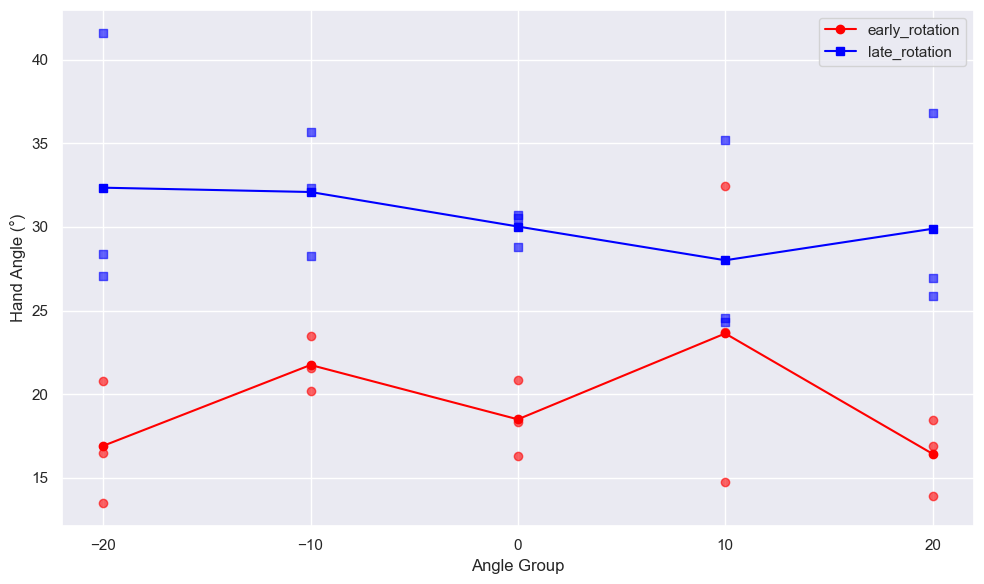

In [13]:
def calculate_and_plot_grouped_averages(data):

    data['rotation_phase'] = pd.cut(data['trial_index'], bins=[0, 74, 224, 424, 624, 824, 899], 
    labels=['familiarization', 'baseline','early_rotation', 'mid_rotation','late_rotation', 'washout'], right=True)

    angle_groups = {
        -20: [13, 33, 53],
        -10: [11, 31, 51],
         0: [10, 30, 50],
        10: [12, 32, 52],
        20: [14, 34, 54]
    }

    target_means = data.groupby(['target_number', 'rotation_phase'], observed=True)['relative_angle'].mean().reset_index()

    target_means['angle_group'] = target_means['target_number'].apply(
        lambda x: next((k for k, v in angle_groups.items() if x in v), None))

    group_means = target_means.groupby(['angle_group', 'rotation_phase'], observed=True)['relative_angle'].mean().reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    colors = { 'early_rotation': 'red', 'late_rotation': 'blue' }
    markers = { 'early_rotation': 'o', 'late_rotation': 's' }
    
    for phase in ['early_rotation', 'late_rotation']:
        for index, row in target_means[target_means['rotation_phase'] == phase].iterrows():
            ax.scatter(row['angle_group'], row['relative_angle'], color=colors[phase], alpha=0.6, marker=markers[phase])
        
        group_data = group_means[group_means['rotation_phase'] == phase]
        ax.plot(group_data['angle_group'], group_data['relative_angle'], color=colors[phase], 
        marker=markers[phase], linestyle='-', label=f"{phase}")

    ax.set_xlabel('Angle Group')
    ax.set_ylabel('Hand Angle (°)')
    ax.set_xticks([-20, -10, 0, 10, 20])
    ax.set_yticks([15, 20, 25, 30, 35, 40]) 
    ax.legend()

    plt.tight_layout()
    #plt.show()
    plt.savefig('pictures/generalization.png')
    #return target_means[target_means['rotation_phase'] == 'late_rotation']

calculate_and_plot_grouped_averages(data)

### PDF

In [14]:
def combine_images_vertically(image_path1, image_path2, output_path):
    
    image1 = Image.open(image_path1)
    image2 = Image.open(image_path2)
    
    width1, height1 = image1.size
    width2, height2 = image2.size
    
    total_width = max(image1.width, image2.width)
    total_height = height1 + height2
    
    combined_image = Image.new('RGB', (total_width, total_height), color=(255, 255, 255))
    
    offset_x = (total_width - width1) // 2
    offset_y = (total_height - height1) // 2
    
    combined_image.paste(image1, (offset_x, 0))
    
    offset_x = (total_width - width2) // 2
    offset_y = (total_height - height2 - height1) // 2
    combined_image.paste(image2, (offset_x, height1))
    
    combined_image.save(output_path)

In [15]:
def combine_images_horizontally(image_path1, image_path2, output_path):
    image1 = Image.open(image_path1)
    image2 = Image.open(image_path2)
    
    width1, height1 = image1.size
    width2, height2 = image2.size
    
    total_width = width1 + width2
    total_height = max(height1, height2)
    
    combined_image = Image.new('RGB', (total_width, total_height), color=(255, 255, 255))
    
    combined_image.paste(image1, (0, 0))
    combined_image.paste(image2, (width1, 0))
    
    combined_image.save(output_path)

In [16]:
def save_images_to_pdf(image_paths, output_path, dpi=300):
    with PdfPages(output_path) as pdf:
        for image_path in image_paths:
            fig, ax = plt.subplots(figsize=(18, 20), dpi=dpi)  
            img = plt.imread(image_path)
            ax.imshow(img)
            ax.axis('off')
            plt.tight_layout()  
            pdf.savefig(fig, dpi=dpi)  
            plt.close()

In [17]:
combine_images_vertically('pictures/movement_trace_1.png', 'pictures/movement_trace_2.png', 
'pictures/movement_trace.png')
combine_images_vertically('pictures/velocity_1.png', 'pictures/velocity_2.png', 
'pictures/velocity.png')
combine_images_vertically('pictures/movement_time_1.png', 'pictures/movement_time_2.png', 
'pictures/movement_time.png')
combine_images_vertically('pictures/movement_time.png', 'pictures/reaction_time.png', 
'pictures/time.png')

combine_images_horizontally('pictures/learning_curve.png', 'pictures/generalization.png', 
'pictures/hand_angle.png')

combine_images_vertically('pictures/time.png', 'pictures/hand_angle.png', 
'pictures/combined.png')

image_paths = ['pictures/movement_trace.png', 'pictures/velocity.png', 'pictures/combined.png']
output_path = 'pdf/analysis_006.pdf'
save_images_to_pdf(image_paths, output_path)

### Probe

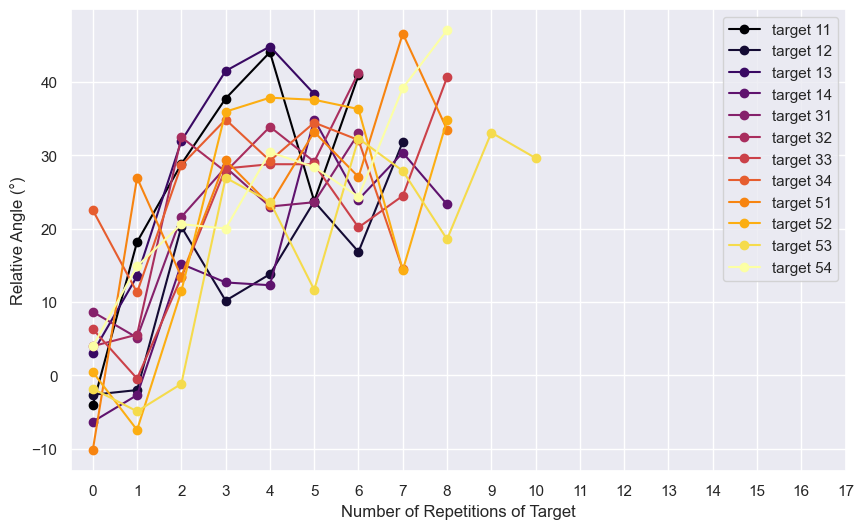

In [18]:
def plot_target_frequency_with_angle(data):
    target_numbers = [11, 12, 13, 14, 31, 32, 33, 34, 51, 52, 53, 54]
    colors = plt.cm.inferno(np.linspace(0, 1, len(target_numbers)))  
    
    plt.figure(figsize=(10, 6))
    
    for target_number, color in zip(target_numbers, colors):
        
        target_data = data[(data['target_number'] == target_number) & (data['trial_index'] >= 74) & (data['trial_index'] <= 824)]
        
        counts_per_trial = target_data['trial_index'].value_counts().sort_index()
        
        x_values = list(range(len(counts_per_trial)))  
        y_values = [data[(data['trial_index'] == idx) & (data['target_number'] == target_number)]['relative_angle'].mean() for idx in counts_per_trial.index]
        
        plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=f'target {target_number}')
    
    plt.xlabel('Number of Repetitions of Target')
    plt.ylabel('Relative Angle (°)')
    plt.xticks(range(0,18))
    plt.legend()
    plt.grid(True)
    #plt.show()

plot_target_frequency_with_angle(data)


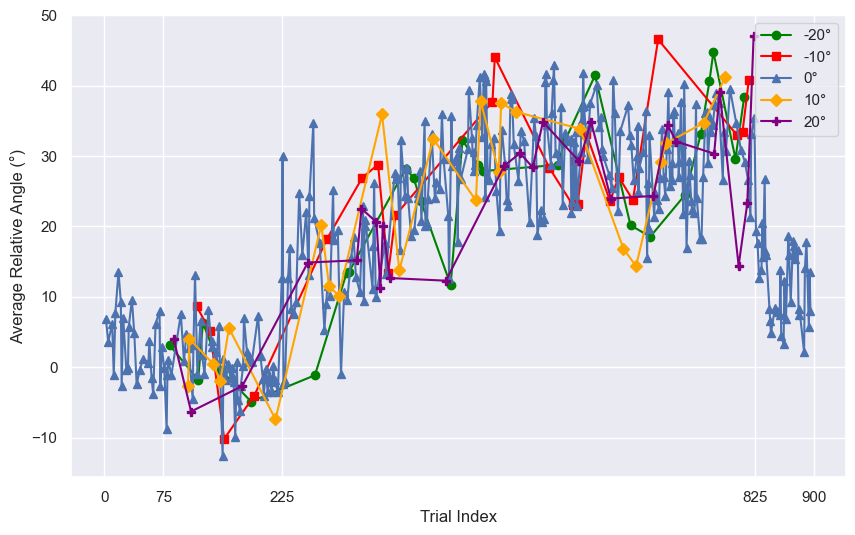

In [19]:
def calculate_and_plot_grouped_angle(data):
    angle_groups = {
        -20: [13, 33, 53],
        -10: [11, 31, 51],
         0: [10, 30, 50],
        10: [12, 32, 52],
        20: [14, 34, 54]
    }

    target_means = data.groupby(['target_number', 'trial_index'])['relative_angle'].mean().reset_index()

    target_means['angle_group'] = target_means['target_number'].apply(
        lambda x: next((k for k, v in angle_groups.items() if x in v), None))

    group_means = target_means.groupby(['angle_group', 'trial_index'])['relative_angle'].mean().reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['green', 'red', 'b', 'orange', 'purple']  
    markers = ['o', 's', '^', 'D', 'P']  
    
    for group, color, marker in zip(angle_groups.keys(), colors, markers):
        group_data = group_means[group_means['angle_group'] == group]
        #smoothed_data = medfilt(group_data['relative_angle'], kernel_size=5)
        ax.plot(group_data['trial_index'], group_data['relative_angle'], color=color, marker=marker, linestyle='-', label=f"{group}°")

    ax.set_xticks([0, 75, 225, 825, 900])
    ax.set_xlabel('Trial Index')
    ax.set_ylabel('Average Relative Angle (°)')
    ax.legend()
    #plt.show()

calculate_and_plot_grouped_angle(data)
